In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import joblib

%matplotlib inline

DATA 불러오기

In [9]:
cl10_gap = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/CL10_gap.csv")
cl15_gap = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/CL15_gap.csv")
gm10_gap = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/GM10_gap.csv")
gm15_gap = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/GM15_gap.csv")




In [10]:
cl10_fix = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/CL10_fix.csv")
cl15_fix = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/CL15_fix.csv")
gm10_fix = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/GM10_fix.csv")
gm15_fix = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/GM15_fix.csv")

cl10_drop = cl10_fix.drop("matchMin", axis=1)
cl15_drop = cl10_fix.drop("matchMin", axis=1)
gm10_drop = gm10_fix.drop("matchMin", axis=1)
gm15_drop = gm15_fix.drop("matchMin", axis=1)

datas = [cl10_drop, cl15_drop, gm10_drop, gm15_drop]
data_label = ["cl10", "cl15", "gm10", "gm15"]

# Human Accuracy

In [16]:
print(1-np.sum(np.abs(cl10_gap["humanPrediction"]-cl10_gap["blueWins"]))/len(cl10_gap))
print(1-np.sum(np.abs(cl15_gap["humanPrediction"]-cl15_gap["blueWins"]))/len(cl15_gap))
print(1-np.sum(np.abs(gm10_gap["humanPrediction"]-gm10_gap["blueWins"]))/len(gm10_gap))
print(1-np.sum(np.abs(gm15_gap["humanPrediction"]-gm15_gap["blueWins"]))/len(gm15_gap))

0.7094017094017093
0.7692307692307692
0.70369406867846
0.7646137787056367


# LGBM

In [7]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric, plot_tree, plot_split_value_histogram, create_tree_digraph

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

## gm15_pred

In [18]:
import seaborn as sns

In [19]:
gm15_pred = pd.read_csv("/Users/ichang-ug/Documents/GitHub/esports_YSAL/LOL/Data/GM15_pred.csv")
gm15_pred


,Unnamed: 0,blueTotalGolds,blueTotalLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueTotalDamageToChampion,blueFirstBlood,blueKill,blueDeath,blueAssist,...,blueHEXTECH_DRAGON,redWATER_DRAGON,redFIRE_DRAGON,redAIR_DRAGON,redEARTH_DRAGON,redCHEMTECH_DRAGON,redHEXTECH_DRAGON,predSuccess,blueWins,pred
0,2328,23666,43,325,67,28806,1,8,13,13,...,0,0,0,0,1,0,0,1,0,0
1,1188,24431,44,328,63,24634,0,7,8,5,...,0,0,0,0,1,0,0,1,0,0
2,2663,23256,42,314,72,21356,1,9,11,9,...,0,0,0,0,0,1,0,1,0,0
3,2396,26887,43,319,80,23349,1,14,16,20,...,0,0,1,0,0,0,0,0,1,0
4,3307,26932,44,384,68,27290,1,11,13,16,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,1067,27138,47,406,79,27152,1,11,9,16,...,0,0,0,0,0,0,1,1,1,1
1146,87,27229,43,362,67,22172,1,13,11,18,...,0,0,1,0,1,0,0,0,0,1
1147,282,25114,42,340,76,23600,0,9,14,11,...,0,0,0,1,0,0,0,1,0,0
1148,1222,27389,45,356,72,27436,0,14,9,15,...,0,0,0,0,0,1,0,1,1,1


In [20]:
np.sum(gm15_pred["predSuccess"])/len(gm15_pred)


0.7973913043478261

In [21]:
pd.DataFrame(gm15_pred["pred"])


,pred
0,0
1,0
2,0
3,0
4,0
...,...
1145,1
1146,1
1147,0
1148,1


In [48]:
data = gm15_gap.iloc[gm15_pred["Unnamed: 0"]].reset_index()
data["pred"]= gm15_pred["pred"]
data["predSuccess"] = gm15_pred["predSuccess"]
data["blueWins"] = gm15_pred["blueWins"]

In [49]:
data.columns

Index(['index', 'Unnamed: 0', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstInhibitor', 'blueFirstDragon', 'matchMin', 'TotalGold_Gap',
       'AvgLever_Gap', 'TotalMinionKills_Gap', 'TotalJungleMinionKills_Gap',
       'TotalDamageToChampion_Gap', 'Kill_Gap', 'Assist_Gap', 'WardPlaced_Gap',
       'WardKills_Gap', 'TowerKills_Gap', 'MidTowerKills_Gap',
       'TopTowerKills_Gap', 'BotTowerKills_Gap', 'Inhibitor_Gap', 'Dragon_Gap',
       'RiftHeralds_Gap', 'humanPrediction', 'pred', 'predSuccess'],
      dtype='object')

<AxesSubplot: xlabel='TotalGold_Gap', ylabel='Count'>

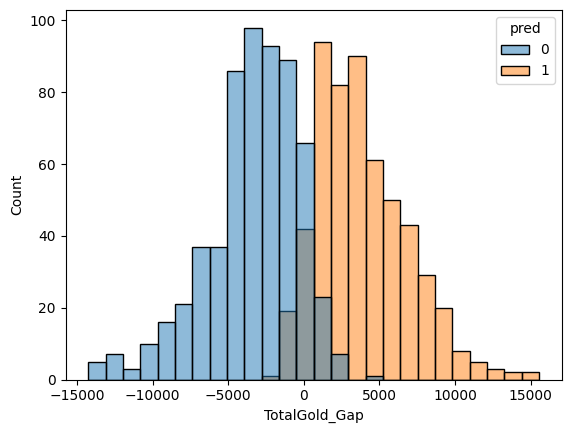

In [50]:
sns.histplot(data = data, x="TotalGold_Gap", hue = "pred")

<AxesSubplot: xlabel='Kill_Gap', ylabel='Count'>

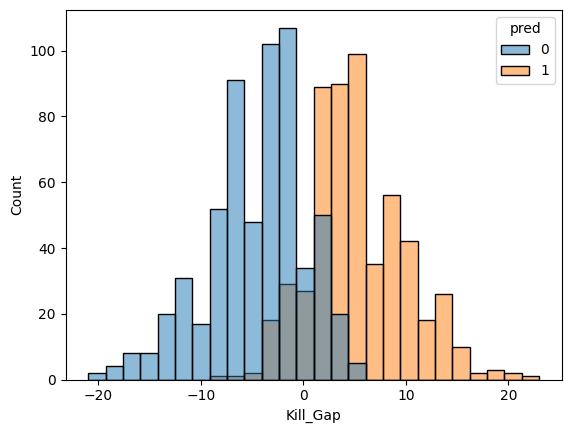

In [51]:
sns.histplot(data = data, x="Kill_Gap", hue = "pred")

<AxesSubplot: xlabel='TotalDamageToChampion_Gap', ylabel='Count'>

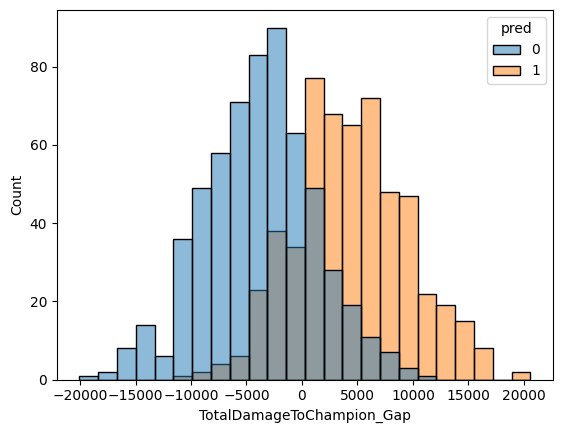

In [52]:
sns.histplot(data = data, x="TotalDamageToChampion_Gap", hue = "pred")

<AxesSubplot: xlabel='WardPlaced_Gap', ylabel='Count'>

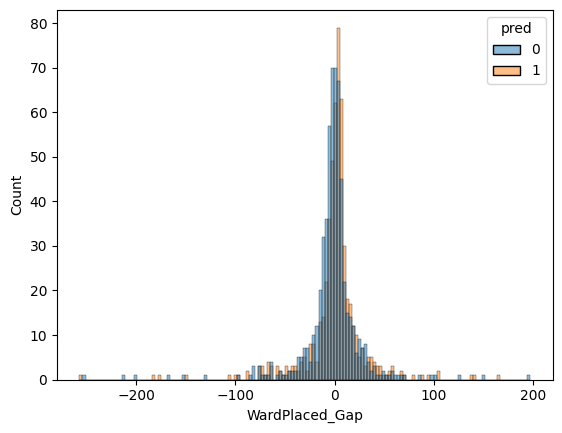

In [53]:
sns.histplot(data = data, x="WardPlaced_Gap", hue = "pred")

## T-test

In [32]:
from scipy import stats

In [72]:
data_1 = data[data["pred"]==1] 
data_1
data_0 = data[data["pred"]==0]
data_0

,index,Unnamed: 0,blueWins,blueFirstBlood,blueFirstTower,blueFirstInhibitor,blueFirstDragon,matchMin,TotalGold_Gap,AvgLever_Gap,...,TowerKills_Gap,MidTowerKills_Gap,TopTowerKills_Gap,BotTowerKills_Gap,Inhibitor_Gap,Dragon_Gap,RiftHeralds_Gap,humanPrediction,pred,predSuccess
0,2328,2328,0,1,0,0,0,36,-3178,-0.2,...,0,-1,0,0,0,-1,-1,0,0,1
1,1188,1188,0,0,0,0,0,36,-354,0.0,...,0,0,0,0,0,-1,1,0,0,1
2,2663,2663,0,1,0,0,0,26,-5828,-0.6,...,0,-1,0,0,0,-1,-1,0,0,1
3,2396,2396,1,1,0,0,0,30,-1610,-0.2,...,0,0,0,0,0,0,-1,0,0,0
4,3307,3307,1,1,0,0,0,28,-1458,-0.2,...,0,0,0,-1,0,-1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1281,1281,0,0,0,0,0,19,-3452,-0.6,...,0,0,0,0,0,-1,1,0,0,1
1140,2310,2310,1,0,0,0,0,25,296,0.4,...,0,0,0,0,0,-2,1,0,0,0
1141,695,695,1,1,0,0,0,39,840,0.4,...,0,0,0,0,0,0,-1,1,0,0
1143,2148,2148,0,0,0,0,0,21,-4094,0.0,...,-1,0,-1,-1,0,-1,1,0,0,1


In [77]:
data.groupby("pred").describe()["TotalGold_Gap"]


,count,mean,std,min,25%,50%,75%,max
pred,,,,,,,,
0,599.0,-3400.190317,3084.354300,-14265.0,-4880.5,-2928.0,-1211.0,4211.0
1,551.0,3869.673321,3026.541381,-2462.0,1514.5,3305.0,5604.5,15562.0


In [67]:

t_stat, p_val = stats.ttest_ind(data_0["TotalGold_Gap"], data_1["TotalGold_Gap"], equal_var=True, alternative='less')
print("TotalGold_gap: \n t_statistics: {}, p_value : {} \n ".format(t_stat, p_val))

t_stat, p_val = stats.ttest_ind(data_0["Kill_Gap"], data_1["Kill_Gap"], equal_var=True, alternative='less')
print("Kill_Gap: \n t_statistics: {}, p_value : {} \n".format(t_stat, p_val))

t_stat, p_val = stats.ttest_ind(data_0["TotalDamageToChampion_Gap"], data_1["TotalDamageToChampion_Gap"], equal_var=True, alternative='less')
print("TotalDamageToChampion_Gap: \n t_statistics: {}, p_value : {} \n".format(t_stat, p_val))

t_stat, p_val = stats.ttest_ind(data_0["WardPlaced_Gap"], data_1["WardPlaced_Gap"], equal_var=True, alternative='less')
print("WardPlaced_Gap: \n t_statistics: {}, p_value : {}\n".format(t_stat, p_val))

TotalGold_gap: 
 t_statistics: -40.290303368556906, p_value : 3.106289078030679e-222 
 
Kill_Gap: 
 t_statistics: -35.6616485323509, p_value : 2.149011910568407e-188 

TotalDamageToChampion_Gap: 
 t_statistics: -27.673785105721702, p_value : 7.280962287052286e-130 

WardPlaced_Gap: 
 t_statistics: -1.3835031625602467, p_value : 0.08338979972915296



<AxesSubplot: xlabel='Kill_Gap', ylabel='Count'>

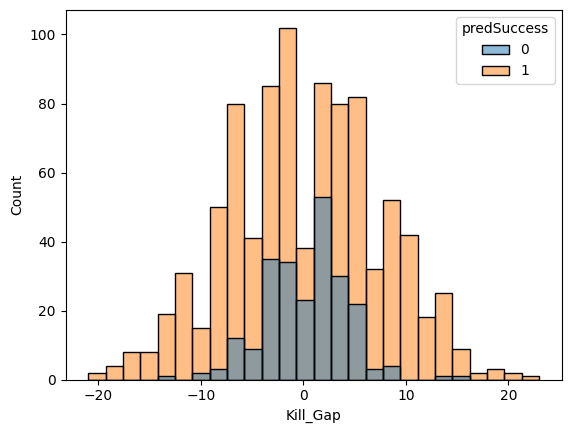

In [68]:
sns.histplot(data = data, x="Kill_Gap", hue = "predSuccess")

<AxesSubplot: xlabel='TotalGold_Gap', ylabel='Count'>

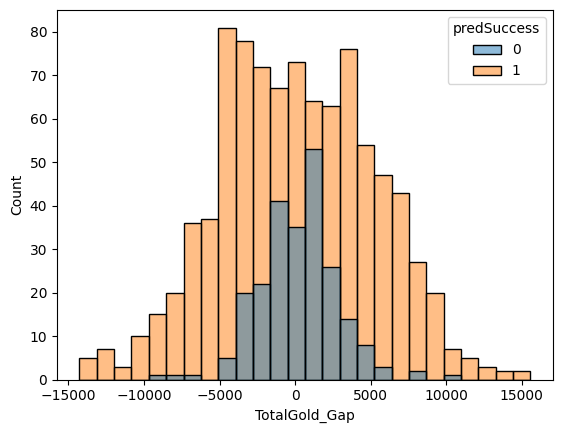

In [69]:
sns.histplot(data = data, x="TotalGold_Gap", hue = "predSuccess")

## T-Test

In [70]:
data_1 = data[data["predSuccess"]==1]
data_0 = data[data["predSuccess"]==0]

In [71]:
t_stat, p_val = stats.ttest_ind(data_0["TotalGold_Gap"], data_1["TotalGold_Gap"], equal_var=True, alternative='two-sided')
print("TotalGold_gap: \n t_statistics: {}, p_value : {} \n ".format(t_stat, p_val))

t_stat, p_val = stats.ttest_ind(data_0["Kill_Gap"], data_1["Kill_Gap"], equal_var=True, alternative='two-sided')
print("Kill_Gap: \n t_statistics: {}, p_value : {} \n".format(t_stat, p_val))


TotalGold_gap: 
 t_statistics: 0.4726942033206567, p_value : 0.6365212141150562 
 
Kill_Gap: 
 t_statistics: 0.09908098654418536, p_value : 0.9210912661720958 

